# Problem Description

__Problem Type:__ Regression 

This project aims to find how significant various features of car are to determining a car's sales price. By using regression techniques we can model this problem as a Multi-linear equation

$$\hat{Y_i} = \beta_0 + (\beta_1x_{i,1}) + (\beta_2 x_{i,2}) +  ...  + (\beta_p x_{i,p}) $$ 

For example, we can model the i'th car's price as (ex. audi 100 ls):
$$CarPrice_i = -3.68 + (1.27 \cdot highwaympg_i) + (.34 \cdot fueltype_i) +  ...  + (.54 \cdot horsepower_i) $$ 

__Problem Motivation__

Since some features of a car model will be more useful than others in determining the sales price, car manufacturers can tailor their production to key factors which consumers' value. So this projects aims to answer 2 questions:
1) ___Which features___ are most predictive of a car's sales price? 
2) ___How much___ does each feature effect a car's sales price?




# Data Overview

This dataset was obtained from Kaggle and contains 205 unique car models with various features regarding car models.
- Number of rows: 205
- Number of columnns: 26

Dataset source: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

__Categorical:__ 12 features

> Car_ID: Unique id of each observation (Categorical) <br>
Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) <br>
carCompany: Name of car company (Categorical) <br>
fueltype: Car fuel type i.e gas or diesel (Categorical)<br>
aspiration: Aspiration used in a car (Categorical)<br>
doornumber: Number of doors in a car (Categorical)<br>
carbody: body of car (Categorical)<br>
drivewheel: type of drive wheel (Categorical)<br>
enginelocation: Location of car engine (Categorical)<br>
enginetype: Type of engine. (Categorical)<br>
cylindernumber: cylinder placed in the car (Categorical)<br>
fuelsystem: Fuel system of car (Categorical)

__Numerical:__ 14 features

> wheelbase: Weelbase of car (Numeric)<br>
carlength: Length of car (Numeric)<br>
carwidth: Width of car (Numeric)<br>
carheight: height of car (Numeric)<br>
curbweight: The weight of a car without occupants or baggage. (Numeric)<br>
enginesize: Size of car (Numeric)<br>
boreratio: Boreratio of car (Numeric)<br>
stroke: Stroke or volume inside the engine (Numeric)<br>
compressionratio: compression ratio of car (Numeric)<br>
horsepower: Horsepower (Numeric)<br>
peakrpm: car peak rpm (Numeric)<br>
citympg: Mileage in city (Numeric)<br>
highwaympg: Mileage on highway (Numeric)<br>
price(Dependent variable): Price of car (Numeric)<br>



___

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
warnings.filterwarnings("ignore")

sns.set() # searborn default aesthetic color scheme

# EDA

In [42]:
df = pd.read_csv("./data/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df = df.drop(['car_ID'],axis=1)
df['symboling'] = df['symboling'].astype('str')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00
horsepower,205.0,104.117073,39.544167,48.00,70.00,95.00,116.00,288.00


In [7]:
df.nunique()

symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

## Price Distribution

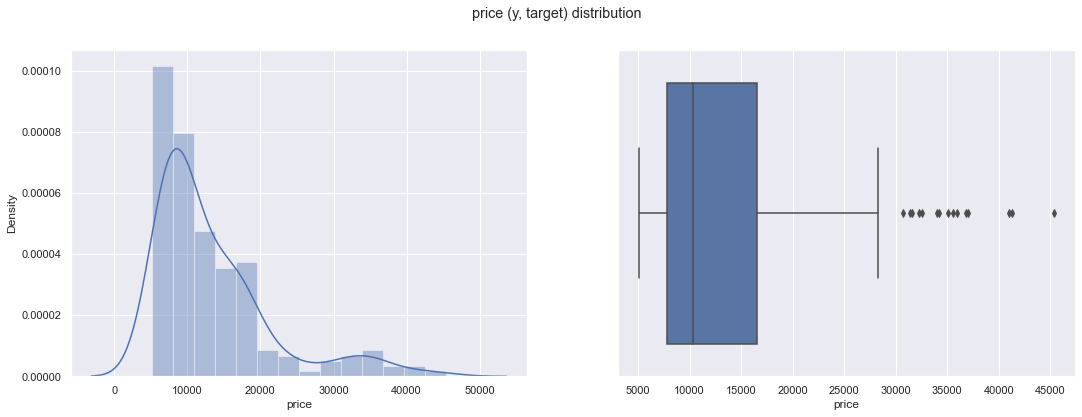

In [8]:
fig,axes = plt.subplots(1,2,figsize=(18,6))
sns.distplot(df['price'], ax=axes[0])
sns.boxplot(df['price'],ax=axes[1])

fig.suptitle("price (y, target) distribution")
plt.show()

- We can see the price is right-skewed 
- Appears to be bi-modal

## Price per Fuel type

<AxesSubplot:xlabel='fueltype', ylabel='Count'>

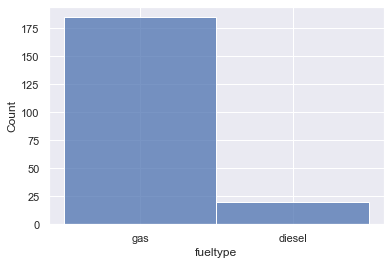

In [9]:
df_tmp = pd.DataFrame(df['fueltype'].value_counts())
sns.histplot(data=df, x="fueltype")

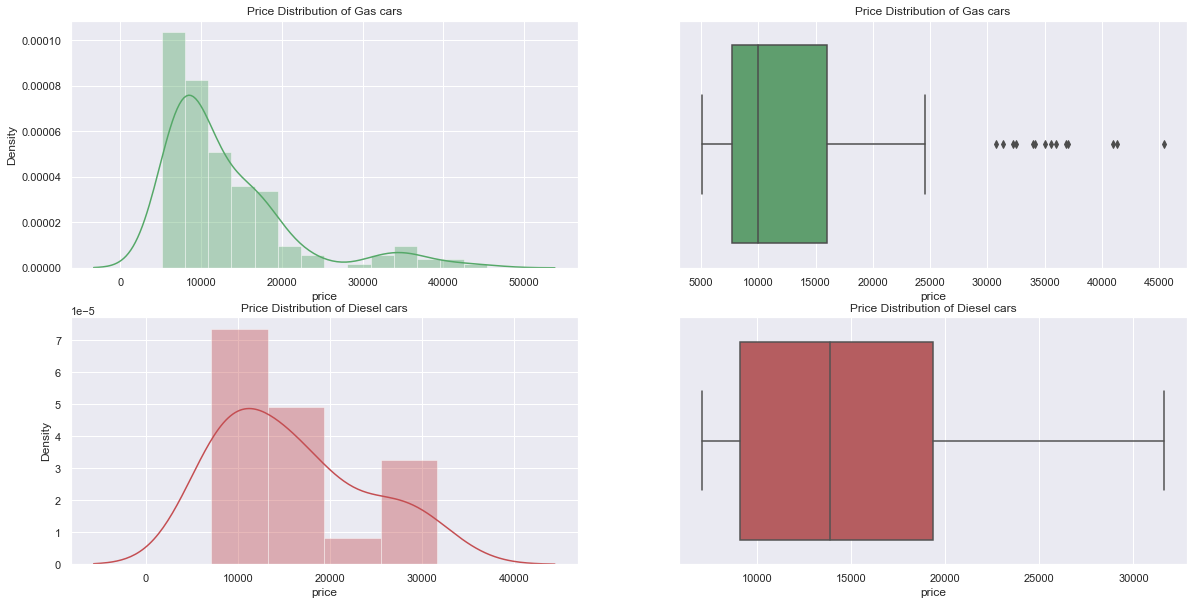

In [10]:
# fig,axes = plt.subplots(2,2, figsize=(20,10))
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.distplot(df[(df.fueltype== 'gas')]["price"],color='g',ax=ax1)
sns.boxplot(df[(df.fueltype== 'gas')]["price"], color='g' ,ax=ax2)
sns.distplot(df[(df.fueltype == 'diesel')]['price'],color='r',ax=ax3)
sns.boxplot(df[(df.fueltype == 'diesel')]['price'], color='r',ax=ax4)
ax1.set_title('Price Distribution of Gas cars')
ax2.set_title('Price Distribution of Gas cars')
ax3.set_title('Price Distribution of Diesel cars')
ax4.set_title('Price Distribution of Diesel cars')

plt.show()

- Diesel cars on average are more expensive

In [11]:
print(f"# of gas cars: {len(df[(df.fueltype== 'gas')])}")
print(f"# of diesel cars: {len(df[(df.fueltype== 'diesel')])}")

# of gas cars: 185
# of diesel cars: 20


## Price Per Door Number

<AxesSubplot:xlabel='doornumber', ylabel='Count'>

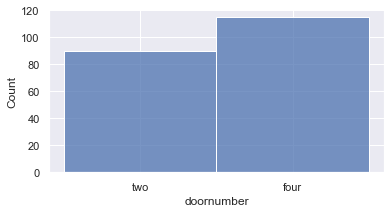

In [12]:
fig = plt.figure(figsize=(6,3))
sns.histplot(data=df, x="doornumber")

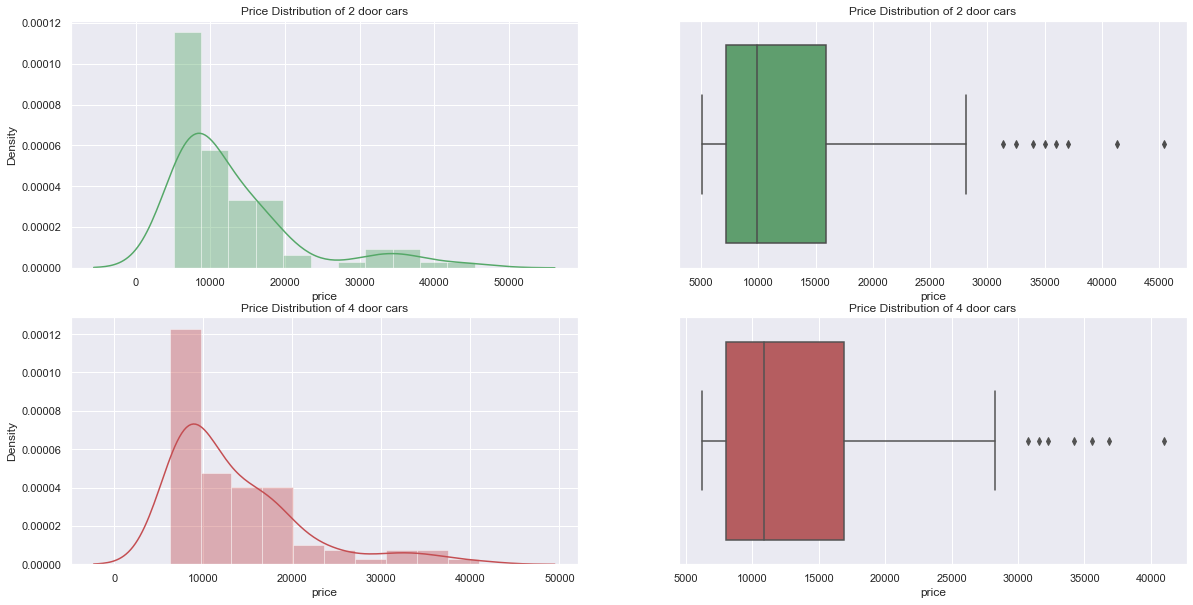

In [13]:
# fig,axes = plt.subplots(2,2, figsize=(20,10))
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.distplot(df[(df.doornumber== 'two')]["price"],color='g',ax=ax1)
sns.boxplot(df[(df.doornumber== 'two')]["price"], color='g' ,ax=ax2)
sns.distplot(df[(df.doornumber == 'four')]['price'],color='r',ax=ax3)
sns.boxplot(df[(df.doornumber == 'four')]['price'], color='r',ax=ax4)
ax1.set_title('Price Distribution of 2 door cars')
ax2.set_title('Price Distribution of 2 door cars')
ax3.set_title('Price Distribution of 4 door cars')
ax4.set_title('Price Distribution of 4 door cars')

plt.show()

- Price Distribution is indifferent between number of car doors

In [14]:
print(f"# of 2 door cars: {len(df[(df.doornumber== 'two')])}")
print(f"# of 4 door cars: {len(df[(df.doornumber== 'four')])}")

# of 2 door cars: 90
# of 4 door cars: 115


## Price Per drivewheel

<AxesSubplot:xlabel='drivewheel', ylabel='Count'>

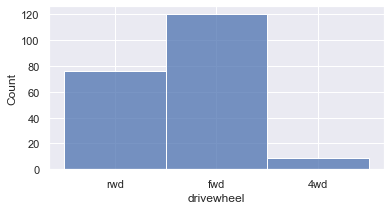

In [15]:
fig = plt.figure(figsize=(6,3))
sns.histplot(data=df, x="drivewheel")

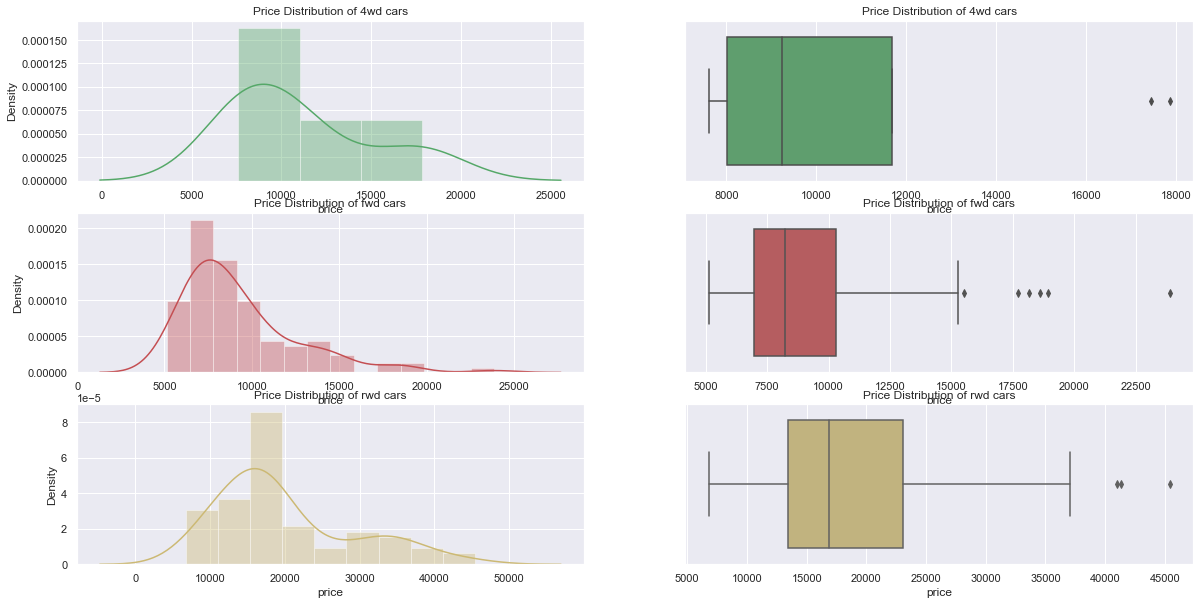

In [16]:
# fig,axes = plt.subplots(2,2, figsize=(20,10))
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

sns.distplot(df[(df.drivewheel== '4wd')]["price"],color='g',ax=ax1)
sns.boxplot(df[(df.drivewheel== '4wd')]["price"], color='g' ,ax=ax2)
sns.distplot(df[(df.drivewheel == 'fwd')]['price'],color='r',ax=ax3)
sns.boxplot(df[(df.drivewheel == 'fwd')]['price'], color='r',ax=ax4)
sns.distplot(df[(df.drivewheel == 'rwd')]['price'],color='y',ax=ax5)
sns.boxplot(df[(df.drivewheel == 'rwd')]['price'], color='y',ax=ax6)

ax1.set_title('Price Distribution of 4wd cars')
ax2.set_title('Price Distribution of 4wd cars')
ax3.set_title('Price Distribution of fwd cars')
ax4.set_title('Price Distribution of fwd cars')
ax5.set_title('Price Distribution of rwd cars')
ax6.set_title('Price Distribution of rwd cars')

plt.show()

- Price Distribution in order from least to most expensive: fwd < 4wd < rwd

In [17]:
print(f"# of 4wd cars: {len(df[(df.drivewheel== '4wd')])}")
print(f"# of fwd cars: {len(df[(df.drivewheel== 'fwd')])}")
print(f"# of rwd cars: {len(df[(df.drivewheel== 'rwd')])}")

# of 4wd cars: 9
# of fwd cars: 120
# of rwd cars: 76


___
# Data Pre-Processing and Data Cleaning

## Feature Engineering
1. Extracting car brand 
2. Car Price level (low, med, high) 

### Feature Engineering: Extracting car brand
> - Car Brands are lumped together with Car Model
> - Car brands are inconsistantly named (ex. volkswagen and vw)

### Extracting and Cleaning up car brand names

In [18]:
df["Brand"] = df['CarName'].apply(lambda x: x.split()[0])

# Fixing inconsistent name car bands 
df = df.replace(to_replace='toyouta', value='toyota')
df = df.replace(to_replace='vokswagen', value='volkswagen')
df = df.replace(to_replace='vw', value='volkswagen')
df = df.replace(to_replace='porcshce', value='porsche')
df = df.replace(to_replace='Nissan', value='nissan')
df = df.replace(to_replace='maxda', value='mazda')

# dropping CarName column
df = df.drop(['CarName'], axis=1) 

df["Brand"].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: Brand, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='Brand'>

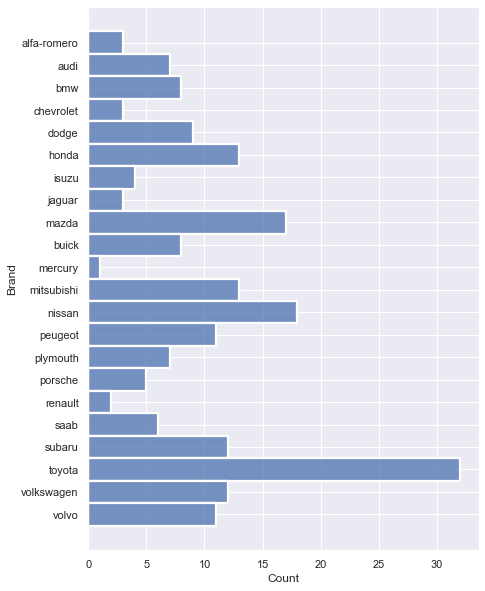

In [19]:
fig = plt.figure(figsize=(7,10))
sns.histplot(data=df, y="Brand")

Ensure no duplicates rows

In [20]:
if not len(df.drop_duplicates()) == len(df):
    df = df.drop_duplicates()
else:
    print('no dupe rows')

no dupe rows


In [21]:
set(df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [22]:
df_features = df.drop(['price'], axis=1) # removing target variable price (Y)

# feature extraction - seperating numerical and categorical features
num_features = [col for col in df_features if df_features[col].dtype != 'object']
cat_features = [col for col in df_features if df_features[col].dtype == 'object']    

In [23]:
print('# of numerical features: ', len(num_features))
print('# of categorical features: ', len(cat_features))

# of numerical features:  13
# of categorical features:  11


#### Feature Engineering: Price level
- The main idea here is to isolate and capture the effects car price tier levels
- Factors that drive Lower-priced cars may be different from higher priced cars

`{low: price <= 10000, Med: 10000 < price <= 30000, High: 30000 < price}`

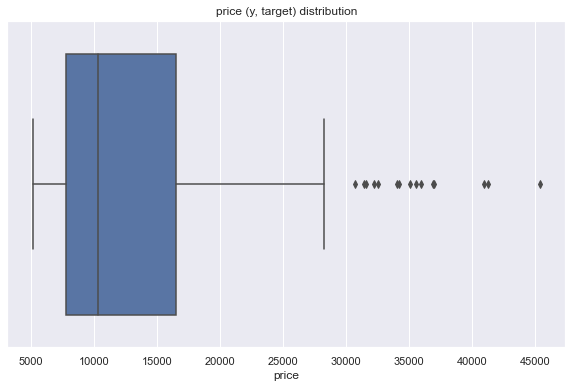

In [24]:
fig=plt.figure(figsize=(10,6))
sns.boxplot(df['price'])
plt.title("price (y, target) distribution");

In [25]:
price_level = []
for price in df['price']:
    level = ''
    if price >= 30000:
        level = 'high'
    elif price >= 10000:
        level = 'med'
    else:
        level = 'low'
    price_level.append(level)  
df['price_level'] = price_level

In [26]:
print(Counter(price_level))

Counter({'low': 100, 'med': 90, 'high': 15})


In [27]:
df.iloc[:5, -3:]

,price,Brand,price_level
0,13495.0,alfa-romero,med
1,16500.0,alfa-romero,med
2,16500.0,alfa-romero,med
3,13950.0,audi,med
4,17450.0,audi,med


___

## Feature selection

Since we have a total of 25 features, we'll need to determine which features will be the most useful and which ones will be redundant

#### Numerical Features

We can use Pearsons correlation as a meassure to remove features that are similar to each other (i.e., highly correlated)

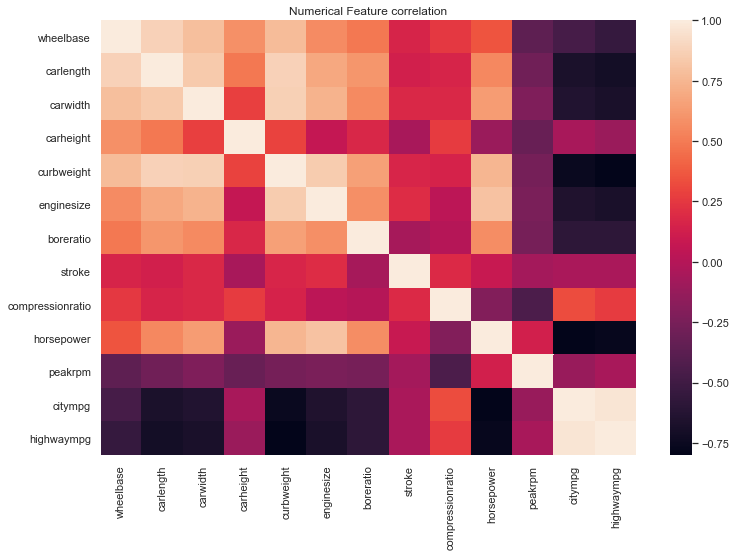

In [28]:
fig=plt.figure(figsize=(12,8))
corr_matrix = df[num_features].corr()
sns.heatmap(corr_matrix)
plt.title("Numerical Feature correlation");

Arbitrary threshold for determinign if 2 features (x1,x2) are Highly correlated 
> Generally speaking a correlation coefficient  0.70 <= x <= 1  is considered strongly correlated

In [29]:
threshold = .85

In [30]:
# columns that are highly correlated with each other
redundant_features = []

for x1 in corr_matrix:
    for x2 in corr_matrix:
        # same feature
        if corr_matrix[x1][x2] == 1:
            continue 
        elif abs(corr_matrix[x1][x2]) >= threshold:
            if [x1,x2] in redundant_features or [x2,x1] in redundant_features:
                continue
            redundant_features.append(sorted([x1,x2]))

As we can see ['citympg', 'highwaympg'] are highly correlated with each other, so we can choose to use one or the other
> After running different regression models I'll test diffrernt correlation thresholds to see if I need to reduce the number of redundant features

In [31]:
print(redundant_features)

[['carlength', 'wheelbase'], ['carlength', 'curbweight'], ['carwidth', 'curbweight'], ['curbweight', 'enginesize'], ['citympg', 'highwaympg']]


Based on the defined correlation threshold, we can see that the following features are interchangeable:
- `carlength` and `wheelbase`
- `carlength` and `curbweight`
- `carwidth` and `curbweight`
- `curbweight` and `enginesize`
- `citympg` and `highwaympg`

Amongst the interchangeable features, I will use the features below (and drop the remaining):
- `carlength`
- `carwidth`
- `enginesize`
- `highwaympg`

In [32]:
drop_redundant_cols = ['wheelbase', 'curbweight', 'citympg']
for col in drop_redundant_cols:
    df = df.drop([col], axis=1) 

In [33]:
num_features = [col for col in df if df[col].dtype != 'object']
cat_features = [col for col in df if df[col].dtype == 'object']    

In [34]:
print('# of numerical features: ', len(num_features))
print('# of categorical features: ', len(cat_features))

# of numerical features:  11
# of categorical features:  12


___
## Regression Analysis

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor 

### Data Prep

In [36]:
df_final = df.copy()

# Extracting the target and features variable
y = df_final['price']
x = df_final.drop(['price'], axis=1)

num_features = [col for col in df_final if df_final[col].dtype != 'object']
cat_features = [col for col in df_final if df_final[col].dtype == 'object']    

#### Encoding and Splitting up Data

In [37]:
# Encoding - breaks up a categorical column, into boolean indicator columns
x = pd.get_dummies(x, columns = cat_features, drop_first=True)

# Split up data between Train data and Test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## Model: Linear Regression

In [38]:
# Instantiate Model and Fit Model with Train Data
lregr = LinearRegression()
lregr_model = lregr.fit(x_train, y_train)
lregr_score = lregr_model.score(x_test,y_test)
print(f"Linear Regression Accuracy Score = {round(lregr_score,4)*100}%")

Linear Regression Accuracy Score = 91.02%


## Model: Random Forest Regression

In [39]:
rf = RandomForestRegressor(n_estimators=100, random_state=80)
rf.fit(x_train, y_train)
rf_predictions = rf.predict(x_test)
rf_score = r2_score(y_test,rf_predictions)
print(f"Random Forrest Regression Score = {round(rf_score,4)*100}%")

Random Forrest Regression Score = 94.39%


# Conclusion

Based on the Accuracy metric, the Random Forest Regression Model (94.39%) performed better than the Linear Regression (91.02%) 

